# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv("heroes_information.csv")
powers_df = pd.read_csv("super_hero_powers.csv")
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df = heroes_df.drop("Unnamed: 0", axis = 1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
print("Here are some of the stats and info for the heroes data set:")
print("")
heroes_df.info()
heroes_df.describe()
print("")
print("Also the stats and info for the powers data set:")
print("")
powers_df.info()
powers_df.describe()

Here are some of the stats and info for the heroes data set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB

Also the stats and info for the powers data set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Adam Strange,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

I will be working with the heroes data set.
Firstly I wanted to get a sense of what the data looked like and what might be obviously wrong so I took the info and saw that there were entries missing from the Publisher and Weight columns. I decided to focus on the weight column first.


In [5]:
heroes_df.info()
heroes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [6]:
heroes_df['Weight'].describe()

count    732.000000
mean      43.855191
std      130.823733
min      -99.000000
25%      -99.000000
50%       62.000000
75%       90.000000
max      900.000000
Name: Weight, dtype: float64

This has a huge standard deviation and the min value is clearly wrong (-99kg) so I next wanted to investigate how many placeholders there were.

In [7]:
heroes_df['Weight'].value_counts('1').sort_values(0)

 331.0    0.001366
 473.0    0.001366
 125.0    0.001366
 214.0    0.001366
 41.0     0.001366
 155.0    0.001366
 187.0    0.001366
 306.0    0.001366
 167.0    0.001366
 207.0    0.001366
 338.0    0.001366
 181.0    0.001366
 900.0    0.001366
 153.0    0.001366
 131.0    0.001366
 268.0    0.001366
 143.0    0.001366
 495.0    0.001366
 315.0    0.001366
 310.0    0.001366
 73.0     0.001366
 133.0    0.001366
 216.0    0.001366
 162.0    0.001366
 39.0     0.001366
 51.0     0.001366
 17.0     0.001366
 124.0    0.001366
 817.0    0.001366
 98.0     0.001366
            ...   
 70.0     0.006831
 55.0     0.006831
 108.0    0.008197
 117.0    0.008197
 97.0     0.009563
 57.0     0.009563
 99.0     0.009563
 135.0    0.010929
 104.0    0.010929
 68.0     0.010929
 72.0     0.010929
 65.0     0.012295
 83.0     0.013661
 95.0     0.013661
 74.0     0.013661
 63.0     0.015027
 88.0     0.015027
 50.0     0.016393
 101.0    0.016393
 61.0     0.017760
 77.0     0.017760
 56.0     0.

As can be seen above, 33% of the total weight entries are placeholders, so this is a far more incomplete data set than I initially thought. Replacing these with the median / mean would hugely skew my data set, but equally the weight column is an important one to have when describing people (or superheroes!).
I have decided to keep the -99 placeholder so that I can see where there is data missing, and replace the 2 null entries with -99 in order to complete the set. Then, when calculating stats, I can remove the -99 outliers before carrying out the analysis to ensure that the answer is still accurate.

In [8]:
heroes_df['Weight'].fillna(-99, inplace= True)
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        734 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


Next I have to deal with the blank publisher. I'm going to check in case any placeholder value is used here too but if not, will randomly assign the blanks with a publisher from the list. This way the data set is completed and the statistics are not influenced by the publisher that I chose as a replacement (as the disribution of the replacement should be very close to the current distribution). 
I would not do this if there were more missing data pieces (e.g. -99 for weight) but as there's only 15 missing items it's the best option I think for preserving the rest of the data.
 I'm only using the top 6 publishers as options because after that there's a >1% chance that the publisher is picked. This will sway the stats slightly but the chance will be minimal.

In [9]:
prob_series = heroes_df.Publisher.value_counts(normalize=True)
prob_series[0:6]

Marvel Comics        0.539638
DC Comics            0.299026
NBC - Heroes         0.026426
Dark Horse Comics    0.025035
Image Comics         0.019471
George Lucas         0.019471
Name: Publisher, dtype: float64

In [10]:
prob_list = prob_series[0:6].tolist()
prob = [i/sum(prob_list) for i in prob_list]
def impute_publisher(value):
    if type(value) != object:
        return np.random.choice(['Marvel Comics','DC Comics','NBC - Heroes', 'Dark Horse Comics', 'George Lucas', 'Image Comics'], p=prob)
    else:
        return value
heroes_df.Publisher = heroes_df.Publisher.map(lambda x: impute_publisher(x))
heroes_df.Publisher.value_counts(normalize=True)

Marvel Comics        0.596730
DC Comics            0.303815
NBC - Heroes         0.029973
Image Comics         0.025886
Dark Horse Comics    0.021798
George Lucas         0.021798
Name: Publisher, dtype: float64

In [11]:
heroes_df.Publisher.value_counts()

Marvel Comics        438
DC Comics            223
NBC - Heroes          22
Image Comics          19
Dark Horse Comics     16
George Lucas          16
Name: Publisher, dtype: int64

Think that I invertedly made the publisher list only 6 publishers long which wasn't my intention at all. One to look at during the 1:1.

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [12]:
heroes_df.set_index('name', inplace = True)
heroes_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Marvel Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,Marvel Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [13]:
powers_df = powers_df.rename(columns = {'hero_names' : 'name'})
powers_df.set_index('name', inplace = True)
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 667 entries, 3-D Man to Zoom
Columns: 167 entries, Agility to Omniscient
dtypes: bool(167)
memory usage: 114.0+ KB


In [14]:
joined_supers = heroes_df.join(powers_df, how = 'inner')

In [15]:
joined_supers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, A-Bomb to Zoom
Columns: 176 entries, Gender to Omniscient
dtypes: bool(167), float64(2), object(7)
memory usage: 159.2+ KB


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [26]:
female = joined_supers[joined_supers['Gender'] == 'Female']
male = joined_supers[joined_supers['Gender'] == 'Male']

In [36]:
total_lines = female.shape[0] + male.shape[0]
joined_supers.shape[0] - total_lines

18

This shows that my code above missed some lines. I am therefore going to look at the original data set to see if the capitalisation etc affected the result.

In [35]:
joined_supers.Gender.value_counts()

Male      464
Female    178
-          18
Name: Gender, dtype: int64

So this proved that there are some blank values. As the set is small and the question asked me to proceed with the data set given (instead of cleaning the data further) I am going to proceed with the 2 data frames that I have.

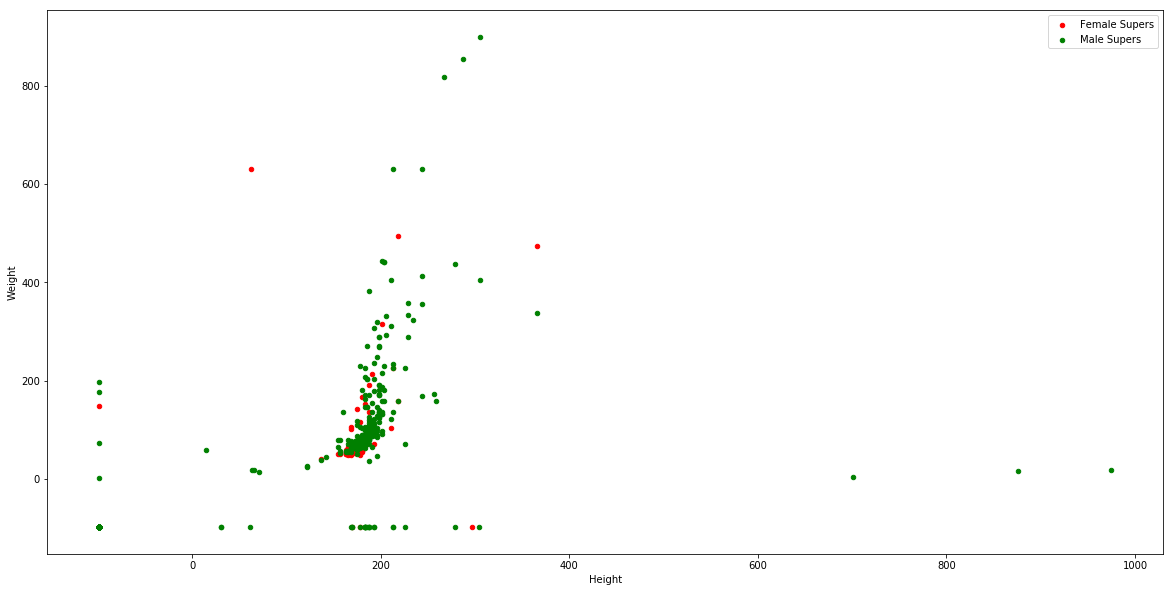

In [39]:
ax1 = female.plot(kind='scatter', x='Height', y='Weight', color='r', figsize = (20,10), label = 'Female Supers')    
ax2 = male.plot(kind='scatter', x='Height', y='Weight', color='g', ax=ax1, label = 'Male Supers') 

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [17]:
male_heroes_df = None
female_heroes_df = None

def show_distplot(dataframe, gender, column_name):
    pass

In [18]:
# Male Height


In [19]:
# Male Weight


In [20]:
# Female Height


In [21]:
# Female Weight


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [42]:
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({"True": 1, "False": 0})
        
    power_counts_dict = dict(df.sum())
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5] 
    
overall_top_5 = top_5_powers(heroes_and_powers_df)
marvel_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'Marvel Comics']
dc_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'DC Comics']
print(overall_top_5)

Index(['Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher',
       'Skin color', 'Alignment', 'Weight', 'Agility',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=176)

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [22]:
#This lab has taken 3 hours to complete.

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data